<a href="https://colab.research.google.com/github/naomibuell/DATA602/blob/main/assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [8]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

# plotly or other graphing library
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
# Load datasets here once and assign to variables iris

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [10]:
# Return the first 5 rows of the data, including the feature names as column headings in a df:
iris_head = iris.head()
print(iris_head)
print("Type:", type(iris_head))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Type: <class 'pandas.core.frame.DataFrame'>


In [11]:
# Return a separate Python list of target names
target_names = iris['species'].tolist()
print(target_names)
print("Type:", type(target_names))

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [12]:
# Split the data into features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Fit the iris dataset into a kNN model with neighbors=5
knn = KNN(n_neighbors=5)
knn.fit(X, y)

# Predict the category of observations
new_observations = knn.predict(X)

# Return back the target names of each prediction
print(new_observations)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'vers

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN with the training data with number of neighbors equal to the function parameter neighbors
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)

new_observations = knn.predict(X_test)

# Generate and return back an accuracy score using the test data that was split out
accuracy = accuracy_score(y_test, new_observations)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
 [1.0, 0.9666666666666667, 0.9416666666666667, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9416666666666667, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9583333333333334, 0.95, 0.9666666666666667, 0.95, 0.9583333333333334, 0.95, 0.95, 0.9583333333333334, 0.9666666666666667, 0.95, 0.9333333333333333, 0.925, 0.9333333333333333] 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


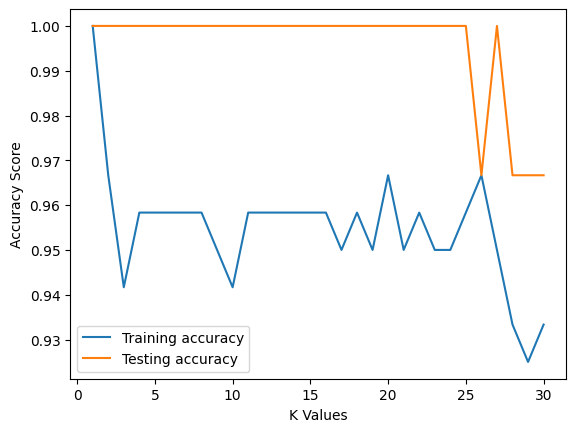

In [14]:
# Create neighbors
neighbors = np.arange(1, 31) # range of neighbor (k) values from 1 to 30
train_accuracies = []
test_accuracies = []

for neighbor in neighbors:
      # Set up a KNN Classifier
      knn = KNN(n_neighbors=neighbor)
      
      # Fit the model
      knn.fit(X_train, y_train)
      
      # Compute accuracy
      train_accuracies.append(knn.score(X_train, y_train))
      test_accuracies.append(knn.score(X_test, y_test))
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Plot the overfitting/underfitting curve
sns.lineplot(x = neighbors, y = train_accuracies, label='Training accuracy')
sns.lineplot(x = neighbors, y = test_accuracies, label='Testing accuracy')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()